# Vamos a realizar la separación de áreas y revisar los flujos de las líneas para validar que el sistema original es igual al sistema con el equivalente Ward. 

In [44]:
# importamos las librerías necesarias
import pandapower as pp
import pandapower.grid_equivalents as ge
import pandapower.networks as pp_net
from _source import sep_system

# importamos matplotlib
import matplotlib.pyplot as plt

In [45]:
# Cargamos el caso y corremos un flujo de carga
net = pp_net.case39()
net.sn_mva = 1.0
pp.runpp(net)
net

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - gen (9 elements)
   - ext_grid (1 element)
   - line (35 elements)
   - trafo (11 elements)
   - poly_cost (10 elements)
   - bus_geodata (39 elements)
 and the following results tables:
   - res_bus (39 elements)
   - res_line (35 elements)
   - res_trafo (11 elements)
   - res_ext_grid (1 element)
   - res_load (21 elements)
   - res_gen (9 elements)

In [55]:
# creamos la configuracón de la red interna para crear el equivalente Ward 
# equivalent type
eq_type = "ward"

# internal buses: we don't need to give all internal buses to the function. Just one of them is enough.
internal_buses = [21]

# boundary buses
boundary_buses = [16, 13]


In [ ]:
# Creamos el equivalente Ward. 
net_eq = ge.get_equivalent(net, eq_type, boundary_buses, internal_buses)

In [57]:
display(net_eq)

This pandapower network includes the following parameter tables:
   - bus (15 elements)
   - load (7 elements)
   - gen (4 elements)
   - ext_grid (1 element)
   - line (10 elements)
   - trafo (4 elements)
   - impedance (3 elements)
   - ward (3 elements)
   - poly_cost (4 elements)
   - bus_geodata (15 elements)
 and the following results tables:
   - res_bus (15 elements)
   - res_line (10 elements)
   - res_trafo (4 elements)
   - res_impedance (3 elements)
   - res_ext_grid (1 element)
   - res_load (7 elements)
   - res_gen (4 elements)
   - res_ward (3 elements)

In [48]:
def get_equialy(df, df_eq, variable):
    list_1, list_2 = [],[]
    for i in df_eq.index.values:
        row_1 = df_eq[variable]
        for value in list(df[variable]):
            if (round(row_1[i],3)==round(value,3)):
                list_1.append(value)
                list_2.append(row_1[i])
                break
    return list_1, list_2


In [49]:
# create a graph 
def create_graph(datos, figsize):
	import numpy as np
	import matplotlib.pyplot as plt

	# set width of bar
	c_i = 1 if len(datos)==0 else len(datos)
	c_j = 1 if len(datos[0])==0 else len(datos[0])
	barWidth = 0.25
	fig, axs = plt.subplots(c_i, c_j, figsize=figsize)
	# figsize=(8,12)
	# Set position of bar on X axis
	k = 0
	for i in range(c_i):
		for j in range(c_j):
			br1 = np.arange(len(datos[i][j][0]))
			br2 = [x + barWidth for x in br1]
			# Make the plot
			try:
				axs[i,j].bar(br1, datos[i][j][0], color ='r', width = barWidth,
						edgecolor ='grey', label ='Red - %s'%datos[i][j][2])
				axs[i,j].bar(br2, datos[i][j][1], color ='g', width = barWidth,
						edgecolor ='grey', label ='Red Ward - %s'%datos[i][j][2]) 
				# Adding Xticks
				axs[i,j].legend() 
			except IndexError:
				axs[k].bar(br1, datos[i][j][0], color ='r', width = barWidth,
						edgecolor ='grey', label ='Red - %s'%datos[i][j][2])
				axs[k].bar(br2, datos[i][j][1], color ='g', width = barWidth,
						edgecolor ='grey', label ='Red Ward - %s'%datos[i][j][2]) 
				# Adding Xticks
				axs[k].legend() 
				k+=1


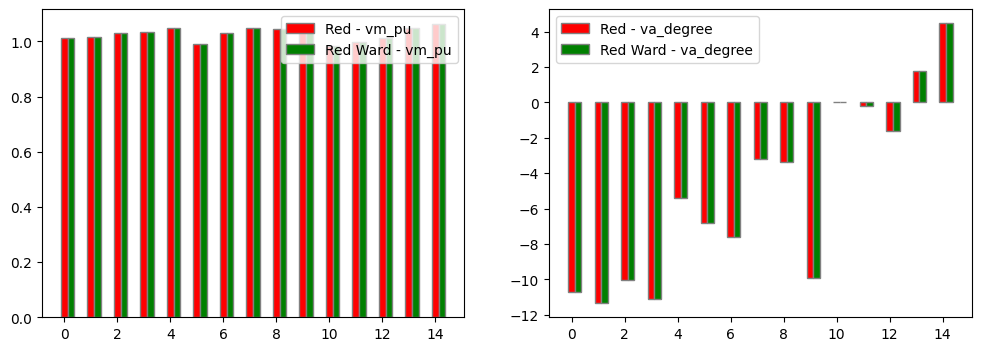

In [58]:
# Resultados de los valores de los nodos

res_1, res_eq_1 = get_equialy(net.res_bus, net_eq.res_bus, 'vm_pu')
res_2, res_eq_2 = get_equialy(net.res_bus, net_eq.res_bus, 'va_degree')
datos = [
    [
        [res_1, res_eq_1, 'vm_pu'], [res_2, res_eq_2, 'va_degree']
    ]
]
create_graph(datos, (12,4))


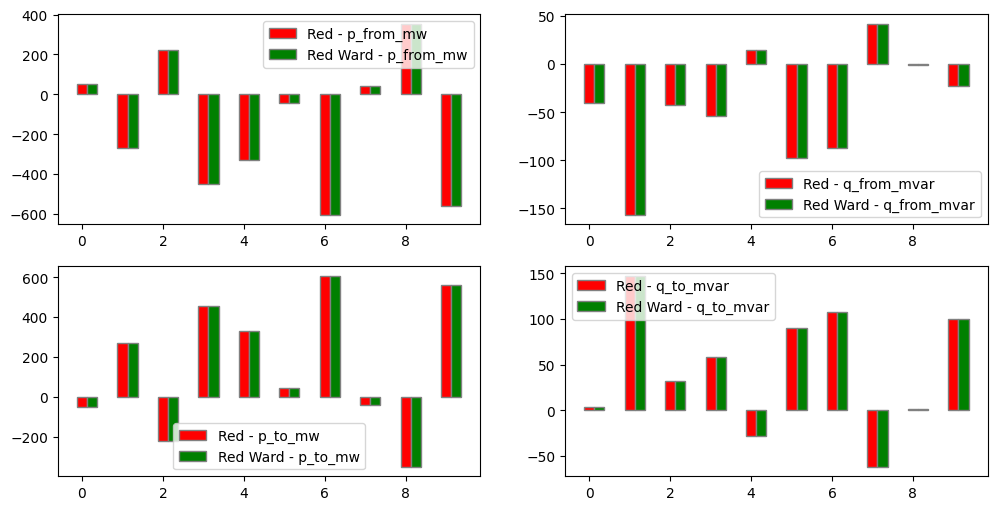

In [59]:
# Resultados de los valores de las líneas

res_1, res_eq_1 = get_equialy(net.res_line, net_eq.res_line, 'p_from_mw')
res_2, res_eq_2 = get_equialy(net.res_line, net_eq.res_line, 'q_from_mvar')
res_3, res_eq_3 = get_equialy(net.res_line, net_eq.res_line, 'p_to_mw')
res_4, res_eq_4 = get_equialy(net.res_line, net_eq.res_line, 'q_to_mvar')

datos = [
    [
        [res_1, res_eq_1, 'p_from_mw'], [res_2, res_eq_2, 'q_from_mvar']
    ],
    [
        [res_3, res_eq_3, 'p_to_mw'], [res_4, res_eq_4, 'q_to_mvar']
    ]
]
create_graph(datos, (12,6))

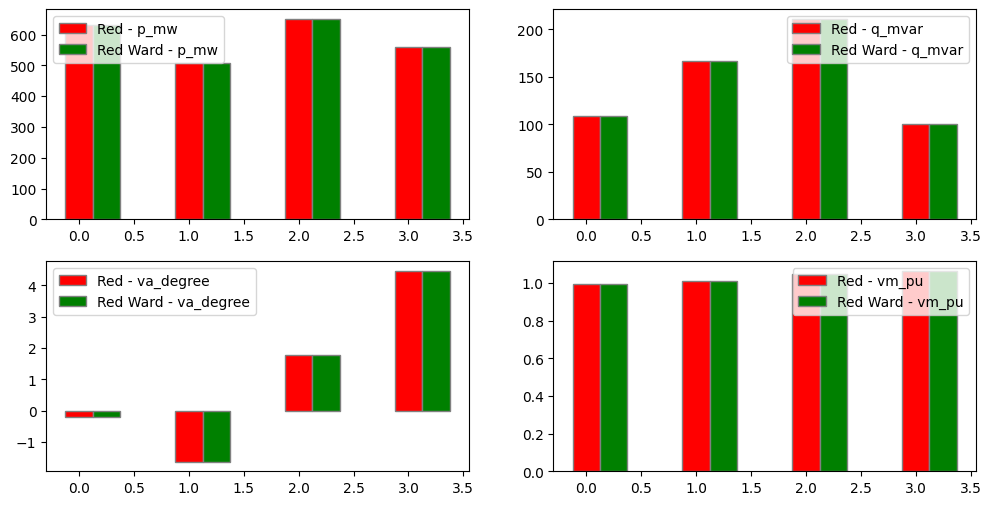

In [60]:
# Resultados de los valores de los generadores 

res_1, res_eq_1 = get_equialy(net.res_gen, net_eq.res_gen, 'p_mw')
res_2, res_eq_2 = get_equialy(net.res_gen, net_eq.res_gen, 'q_mvar')
res_3, res_eq_3 = get_equialy(net.res_gen, net_eq.res_gen, 'va_degree')
res_4, res_eq_4 = get_equialy(net.res_gen, net_eq.res_gen, 'vm_pu')

datos = [
    [
        [res_1, res_eq_1, 'p_mw'], [res_2, res_eq_2, 'q_mvar']
    ],
    [
        [res_3, res_eq_3, 'va_degree'], [res_4, res_eq_4, 'vm_pu']
    ]
]
create_graph(datos, (12,6))

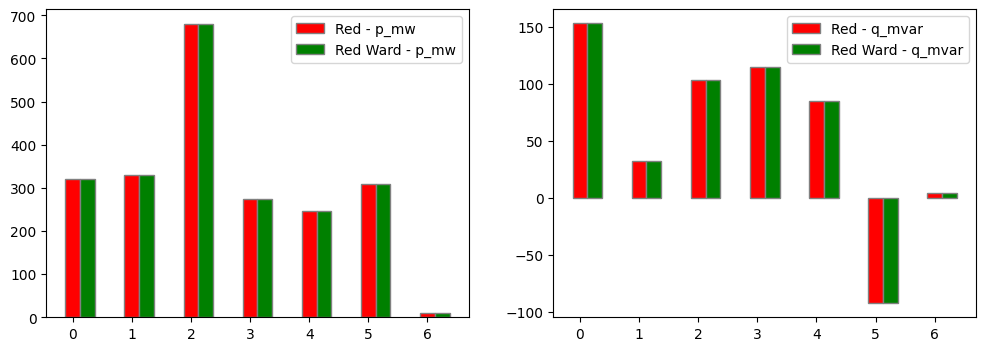

In [61]:
# Resultados de los valores de las cargas

res_1, res_eq_1 = get_equialy(net.res_load, net_eq.res_load, 'p_mw')
res_2, res_eq_2 = get_equialy(net.res_load, net_eq.res_load, 'q_mvar')
datos = [
    [
        [res_1, res_eq_1, 'p_mw'], [res_2, res_eq_2, 'q_mvar']
    ]
]
create_graph(datos, (12,4))